In [55]:
import pandas as pd
import os
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#from sklearn.preprocessing import PolynomialFeatures
import tifffile 

In [56]:
df = pd.read_excel (os.path.join('input.xls'))
dataset = pd.DataFrame.to_numpy(df)

X = dataset[:, :-1]
y = dataset[:, -1]

normX = preprocessing.normalize(X)

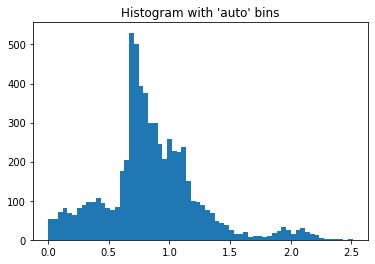

In [57]:
import matplotlib.pyplot as plt
rng = np.random.RandomState()  # deterministic random data

np.histogram(y)

plt.hist(y, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")

plt.show()

In [58]:
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

Linear regresssion

In [12]:
#import sklearn.linear_model

model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

print(r2_score(y_train, model.predict(X_train)), r2_score(y_test, model.predict(X_test)))
print(mean_squared_error(y_train, model.predict(X_train)), mean_squared_error(y_test, model.predict(X_test)))

0.5489400275684269 0.5313030702918069
0.06959009439959558 0.07150711078813365


Polynomial regression

In [10]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [102]:
X_t, X_test, y_t, y_test = train_test_split(X_poly, y, test_size=0.1, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

In [103]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(r2_score(y_train, lin_reg.predict(X_train)), r2_score(y_test, lin_reg.predict(X_test)))
print(mean_squared_error(y_train, lin_reg.predict(X_train)), mean_squared_error(y_test, lin_reg.predict(X_test)))

0.6849022101378139 0.6615458333036843
0.048613679514512745 0.051636522581291054


Linear regression SVM

In [104]:
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

In [105]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X_train, y_train)

print(r2_score(y_train, svm_reg.predict(X_train)), r2_score(y_test, svm_reg.predict(X_test)))
print(mean_squared_error(y_train, svm_reg.predict(X_train)), mean_squared_error(y_test, svm_reg.predict(X_test)))

-0.19058971409337366 -0.17348029664129072
0.1836856641220019 0.17903293207374701


Regression SVM

In [13]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X_train, y_train)

print(r2_score(y_train, svm_poly_reg.predict(X_train)), r2_score(y_test, svm_poly_reg.predict(X_test)))
print(mean_squared_error(y_train, svm_poly_reg.predict(X_train)), mean_squared_error(y_test, svm_poly_reg.predict(X_test)))

0.6410626764967595 0.6324172459652317
0.05537729737239757 0.05608054811226552


In [81]:
from sklearn.model_selection import GridSearchCV

# Make sure the dataset is a square matrix if you are using kernel='precomputed'. Otherwise avoid using 'precomputed'.
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'C': [0.1, 1, 10],
    'epsilon': [0.001, 0.01, 0.1]# 'log2'],
    #'criterion' :['gini', 'entropy']
}

import time
start = time.time()
model = SVR()
reg = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5, verbose = 3)
reg.fit(X_train, y_train)
duration = time.time() - start
print(duration)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END C=0.1, degree=2, epsilon=0.001, kernel=linear;, score=0.275 total time=   0.2s
[CV 2/5] END C=0.1, degree=2, epsilon=0.001, kernel=linear;, score=0.267 total time=   0.2s
[CV 3/5] END C=0.1, degree=2, epsilon=0.001, kernel=linear;, score=0.288 total time=   0.2s
[CV 4/5] END C=0.1, degree=2, epsilon=0.001, kernel=linear;, score=0.276 total time=   0.2s
[CV 5/5] END C=0.1, degree=2, epsilon=0.001, kernel=linear;, score=0.218 total time=   0.2s
[CV 1/5] END C=0.1, degree=2, epsilon=0.001, kernel=poly;, score=0.439 total time=   0.3s
[CV 2/5] END C=0.1, degree=2, epsilon=0.001, kernel=poly;, score=0.403 total time=   0.3s
[CV 3/5] END C=0.1, degree=2, epsilon=0.001, kernel=poly;, score=0.455 total time=   0.3s
[CV 4/5] END C=0.1, degree=2, epsilon=0.001, kernel=poly;, score=0.436 total time=   0.3s
[CV 5/5] END C=0.1, degree=2, epsilon=0.001, kernel=poly;, score=0.386 total time=   0.3s
[CV 1/5] END C=0.1, degree=

[CV 1/5] END C=0.1, degree=3, epsilon=0.01, kernel=rbf;, score=0.620 total time=   0.5s
[CV 2/5] END C=0.1, degree=3, epsilon=0.01, kernel=rbf;, score=0.571 total time=   0.5s
[CV 3/5] END C=0.1, degree=3, epsilon=0.01, kernel=rbf;, score=0.642 total time=   0.6s
[CV 4/5] END C=0.1, degree=3, epsilon=0.01, kernel=rbf;, score=0.629 total time=   0.5s
[CV 5/5] END C=0.1, degree=3, epsilon=0.01, kernel=rbf;, score=0.556 total time=   0.5s
[CV 1/5] END C=0.1, degree=3, epsilon=0.01, kernel=sigmoid;, score=-141.305 total time=   0.5s
[CV 2/5] END C=0.1, degree=3, epsilon=0.01, kernel=sigmoid;, score=-143.386 total time=   0.5s
[CV 3/5] END C=0.1, degree=3, epsilon=0.01, kernel=sigmoid;, score=-144.933 total time=   0.5s
[CV 4/5] END C=0.1, degree=3, epsilon=0.01, kernel=sigmoid;, score=-138.150 total time=   0.5s
[CV 5/5] END C=0.1, degree=3, epsilon=0.01, kernel=sigmoid;, score=-129.838 total time=   0.5s
[CV 1/5] END C=0.1, degree=3, epsilon=0.1, kernel=linear;, score=0.288 total time=   

[CV 2/5] END C=1, degree=2, epsilon=0.001, kernel=linear;, score=0.377 total time=   0.2s
[CV 3/5] END C=1, degree=2, epsilon=0.001, kernel=linear;, score=0.422 total time=   0.2s
[CV 4/5] END C=1, degree=2, epsilon=0.001, kernel=linear;, score=0.410 total time=   0.2s
[CV 5/5] END C=1, degree=2, epsilon=0.001, kernel=linear;, score=0.339 total time=   0.2s
[CV 1/5] END C=1, degree=2, epsilon=0.001, kernel=poly;, score=0.530 total time=   0.5s
[CV 2/5] END C=1, degree=2, epsilon=0.001, kernel=poly;, score=0.492 total time=   0.5s
[CV 3/5] END C=1, degree=2, epsilon=0.001, kernel=poly;, score=0.559 total time=   0.5s
[CV 4/5] END C=1, degree=2, epsilon=0.001, kernel=poly;, score=0.520 total time=   0.7s
[CV 5/5] END C=1, degree=2, epsilon=0.001, kernel=poly;, score=0.494 total time=   0.6s
[CV 1/5] END C=1, degree=2, epsilon=0.001, kernel=rbf;, score=0.688 total time=   0.6s
[CV 2/5] END C=1, degree=2, epsilon=0.001, kernel=rbf;, score=0.648 total time=   0.5s
[CV 3/5] END C=1, degree=2

[CV 4/5] END C=1, degree=3, epsilon=0.01, kernel=rbf;, score=0.704 total time=   0.5s
[CV 5/5] END C=1, degree=3, epsilon=0.01, kernel=rbf;, score=0.636 total time=   0.5s
[CV 1/5] END C=1, degree=3, epsilon=0.01, kernel=sigmoid;, score=-13094.437 total time=   0.5s
[CV 2/5] END C=1, degree=3, epsilon=0.01, kernel=sigmoid;, score=-13286.383 total time=   0.5s
[CV 3/5] END C=1, degree=3, epsilon=0.01, kernel=sigmoid;, score=-13457.257 total time=   0.5s
[CV 4/5] END C=1, degree=3, epsilon=0.01, kernel=sigmoid;, score=-12792.983 total time=   0.5s
[CV 5/5] END C=1, degree=3, epsilon=0.01, kernel=sigmoid;, score=-12091.739 total time=   0.5s
[CV 1/5] END C=1, degree=3, epsilon=0.1, kernel=linear;, score=0.417 total time=   0.1s
[CV 2/5] END C=1, degree=3, epsilon=0.1, kernel=linear;, score=0.383 total time=   0.1s
[CV 3/5] END C=1, degree=3, epsilon=0.1, kernel=linear;, score=0.427 total time=   0.1s
[CV 4/5] END C=1, degree=3, epsilon=0.1, kernel=linear;, score=0.417 total time=   0.1s
[

[CV 1/5] END C=10, degree=2, epsilon=0.001, kernel=poly;, score=0.544 total time=   1.9s
[CV 2/5] END C=10, degree=2, epsilon=0.001, kernel=poly;, score=0.562 total time=   1.6s
[CV 3/5] END C=10, degree=2, epsilon=0.001, kernel=poly;, score=0.637 total time=   1.8s
[CV 4/5] END C=10, degree=2, epsilon=0.001, kernel=poly;, score=0.575 total time=   1.6s
[CV 5/5] END C=10, degree=2, epsilon=0.001, kernel=poly;, score=0.578 total time=   1.6s
[CV 1/5] END C=10, degree=2, epsilon=0.001, kernel=rbf;, score=0.727 total time=   0.7s
[CV 2/5] END C=10, degree=2, epsilon=0.001, kernel=rbf;, score=0.687 total time=   0.9s
[CV 3/5] END C=10, degree=2, epsilon=0.001, kernel=rbf;, score=0.757 total time=   1.0s
[CV 4/5] END C=10, degree=2, epsilon=0.001, kernel=rbf;, score=0.746 total time=   1.0s
[CV 5/5] END C=10, degree=2, epsilon=0.001, kernel=rbf;, score=0.685 total time=   0.9s
[CV 1/5] END C=10, degree=2, epsilon=0.001, kernel=sigmoid;, score=-1296754.081 total time=   0.6s
[CV 2/5] END C=1

[CV 2/5] END C=10, degree=3, epsilon=0.01, kernel=sigmoid;, score=-1315808.937 total time=   0.5s
[CV 3/5] END C=10, degree=3, epsilon=0.01, kernel=sigmoid;, score=-1332939.069 total time=   0.5s
[CV 4/5] END C=10, degree=3, epsilon=0.01, kernel=sigmoid;, score=-1266406.452 total time=   0.5s
[CV 5/5] END C=10, degree=3, epsilon=0.01, kernel=sigmoid;, score=-1197408.891 total time=   0.5s
[CV 1/5] END C=10, degree=3, epsilon=0.1, kernel=linear;, score=0.522 total time=   0.1s
[CV 2/5] END C=10, degree=3, epsilon=0.1, kernel=linear;, score=0.472 total time=   0.1s
[CV 3/5] END C=10, degree=3, epsilon=0.1, kernel=linear;, score=0.530 total time=   0.1s
[CV 4/5] END C=10, degree=3, epsilon=0.1, kernel=linear;, score=0.515 total time=   0.1s
[CV 5/5] END C=10, degree=3, epsilon=0.1, kernel=linear;, score=0.451 total time=   0.1s
[CV 1/5] END C=10, degree=3, epsilon=0.1, kernel=poly;, score=0.594 total time=   6.5s
[CV 2/5] END C=10, degree=3, epsilon=0.1, kernel=poly;, score=0.545 total ti

In [82]:
reg.best_params_

{'C': 10, 'degree': 2, 'epsilon': 0.1, 'kernel': 'rbf'}

In [88]:
# Make sure the dataset is a square matrix if you are using kernel='precomputed'. Otherwise avoid using 'precomputed'.
param_grid = {
    'kernel': ['rbf'],
    'C': [1000, 4000],
    'epsilon': [0.1]# 'log2'],
    #'criterion' :['gini', 'entropy']
}

import time
start = time.time()
model0 = SVR()
reg0 = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5, verbose = 3)
reg0.fit(X_train, y_train)
duration = time.time() - start
print(duration)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...C=1000, epsilon=0.1, kernel=rbf;, score=0.782 total time=   2.2s
[CV 2/5] END ...C=1000, epsilon=0.1, kernel=rbf;, score=0.749 total time=   2.5s
[CV 3/5] END ...C=1000, epsilon=0.1, kernel=rbf;, score=0.822 total time=   2.3s
[CV 4/5] END ...C=1000, epsilon=0.1, kernel=rbf;, score=0.805 total time=   2.8s
[CV 5/5] END ...C=1000, epsilon=0.1, kernel=rbf;, score=0.761 total time=   2.4s
[CV 1/5] END ...C=4000, epsilon=0.1, kernel=rbf;, score=0.784 total time=   6.9s
[CV 2/5] END ...C=4000, epsilon=0.1, kernel=rbf;, score=0.686 total time=   6.5s
[CV 3/5] END ...C=4000, epsilon=0.1, kernel=rbf;, score=0.827 total time=   6.9s
[CV 4/5] END ...C=4000, epsilon=0.1, kernel=rbf;, score=0.791 total time=   7.3s
[CV 5/5] END ...C=4000, epsilon=0.1, kernel=rbf;, score=0.744 total time=   5.6s
49.93667435646057


In [89]:
reg0.best_params_

{'C': 1000, 'epsilon': 0.1, 'kernel': 'rbf'}

In [107]:
svm_poly_reg = SVR(kernel="rbf", degree=2, C=1000, epsilon=0.1)
svm_poly_reg.fit(X_train, y_train)

print(r2_score(y_train, svm_poly_reg.predict(X_train)), r2_score(y_test, svm_poly_reg.predict(X_test)))
print(mean_squared_error(y_train, svm_poly_reg.predict(X_train)), mean_squared_error(y_test, svm_poly_reg.predict(X_test)))

0.8124988344925081 0.7802120809629793
0.02892791337116485 0.03353211442255123


Random forest regression

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

In [61]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

print(r2_score(y_train, regr.predict(X_train)), r2_score(y_test, regr.predict(X_test)))
print(mean_squared_error(y_train, regr.predict(X_train)), mean_squared_error(y_test, regr.predict(X_test)))

0.7466914360617694 0.7476046629299182
0.0390807607725858 0.038506890458009306


In [163]:
np.linspace(start = 200, stop = 2000, num = 10)

array([ 200.,  400.,  600.,  800., 1000., 1200., 1400., 1600., 1800.,
       2000.])

In [114]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [121]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
start = time.time()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=3, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
duration = time.time() - start
print(duration)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
116.01811599731445


In [122]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [62]:
regr0 = RandomForestRegressor(n_estimators = 1400, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 30, bootstrap = True)
regr0.fit(X_train, y_train)

print(r2_score(y_train, regr0.predict(X_train)), r2_score(y_test, regr0.predict(X_test)))
print(mean_squared_error(y_train, regr0.predict(X_train)), mean_squared_error(y_test, regr0.predict(X_test)))

0.9568452117848725 0.8612285347487361
0.006657974480634862 0.021171776282238153


Using values to map depth along the lake

In [21]:
def load_img_from_folder(folder):
    images = []
    names = []
    for filename in os.listdir(folder):
        img = tifffile.imread(os.path.join(folder,filename))
        names.append(filename)
        images.append(img)
    return images, names

path = '.'
images, names = load_img_from_folder('images')

In [81]:
mask = images[0]
img_shp = np.shape(mask)
bands = np.stack((images[1], images[2], images[3], images[4], images[5], images[6]), axis = 2)

ind = np.reshape(mask, (img_shp[0]*img_shp[1], 1))
input = np.reshape(bands, (img_shp[0]*img_shp[1], 6))
input = input/10000

In [84]:
nz_ind = np.nonzero(ind)

In [87]:
y_pred=np.ones(len(ind))*-99

for i in nz_ind:
    sample = input[i, :]
    y_samp = regr0.predict(sample)
    y_pred[i] = y_samp

In [99]:
depth = np.reshape(y_pred, (img_shp[0],img_shp[1]))

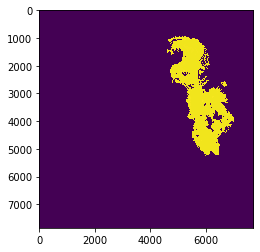

In [100]:
plt.imshow(depth)

In [111]:
value,position = min(((b,a) for a,b in enumerate(y_pred) if b>-99), default=(None,None))

value

0.026972848742527315

In [120]:
import rasterio

ref_img = rasterio.open('./images/LC08_L1TP_169034_20180325_20180404_01_T1_sr_band2.tif')

ref_img.bounds

BoundingBox(left=362385.0, bottom=4029285.0, right=594315.0, top=4264815.0)

In [125]:
from rasterio.warp import calculate_default_transform

src = rasterio.open('./images/LC08_L1TP_169034_20180325_20180404_01_T1_sr_band2.tif')

with rasterio.open('./images/LC08_L1TP_169034_20180325_20180404_01_T1_sr_band2.tif') as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

NameError: name 'dst_crs' is not defined

In [127]:
#!pip install gdal

from osgeo import gdal

In [134]:
step1 = gdal.Open('./images/LC081690342018032501T1-SC20190406090751_MainWaterBody.tif', gdal.GA_ReadOnly)
GT_input = step1.GetGeoTransform()
step2 = step1.GetRasterBand(1)
img_as_array = step2.ReadAsArray()
size1,size2=img_as_array.shape
op =np.zeros(shape=(size1,size2))

In [139]:
#!pip install rioxarray
import rioxarray as rxr

In [143]:
step3 = rxr.open_rasterio('./images/LC081690342018032501T1-SC20190406090751_MainWaterBody.tif', masked=True)
dst_crs= step3.rio.crs

In [158]:
depth0 = depth
depth0[depth0 == -99] = np.nan

In [159]:
import xarray as xr
#.DataArray
xr_dep = xr.DataArray(depth0)

In [160]:
depth_proj = xr_dep.rio.set_crs(dst_crs, inplace=True)

In [161]:
tifffile.imsave('test2.tif', depth_proj)

In [151]:
depth_proj.save('test.tif')

AttributeError: 'DataArray' object has no attribute 'save'

In [144]:
with rasterio.open(
    'output_map.tif',
    'w',
    driver='GTiff',
    height=op.shape[0],
    width=op.shape[1],
    count=1,
    dtype=np.float32,
    crs=dst_crs,
    transform=GT_input,
) as dest_file:
    dest_file.write(depth, 1)
dest_file.close()

TypeError: GDAL-style transforms have been deprecated.  This exception will be raised for a period of time to highlight potentially confusing errors, but will eventually be removed.

In [64]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_train, y_train)

print(sgd_reg.score(X_train, y_train), sgd_reg.score(X_test, y_test))

0.2981894783740483 0.28331230830705245
